In [2]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

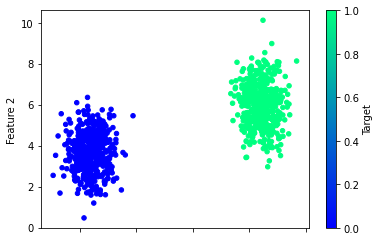

In [3]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [4]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [5]:
# To normalize data and optimize model performance, create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit to scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [6]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

2022-01-14 14:54:52.685562: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
# Add the next layer with the hidden layers and inputs
# Inputs and first hidden layer are alwasys built in the same instance
# To add more layers, user Kera's Dense class

In [8]:
# Add our first Dense layer, including input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation='relu', input_dim=2))

In [9]:
# Next I need to add an output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [10]:
# Check the structure of the sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Compiling the model is the process of informing the model how it should learn and trainusing specific optimization
# functions and loss metrics
# Compile the Sequentual model together and customize metrics
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8366 - accuracy: 0.1707
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8180 - accuracy: 0.0387
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8018 - accuracy: 0.0440
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7873 - accuracy: 0.0560
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7748 - accuracy: 0.0653
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7637 - accuracy: 0.0827
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7539 - accuracy: 0.1000
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7453 - accuracy: 0.1253
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7378 - accuracy: 0.1573
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7312 - accuracy: 0.1840
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5067
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5067
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5067
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5067
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5067
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5067
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5067
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5067
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5067
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5067
Epoch 93/100


<AxesSubplot:>

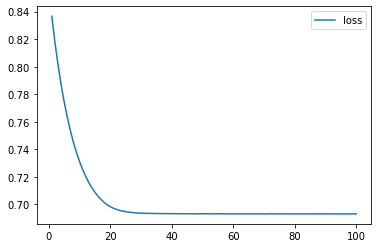

In [13]:
# Visualize the model's loss over the 100 epochs
# Create a dataframe containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history['loss'])+1))

# Plot the loss
history_df.plot(y='loss')

<AxesSubplot:>

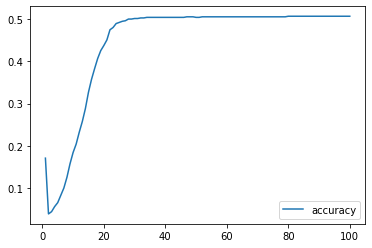

In [14]:
# Plot the accuracy over time with the same df
history_df.plot(y='accuracy')

In [15]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.6940 - accuracy: 0.4800 - 131ms/epoch - 16ms/step
Loss: 0.693983256816864, Accuracy: 0.47999998927116394


In [16]:
import numpy as np
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)

# Below if the old way to do it, but tensorflow updated things
#nn_model.predict_classes(new_X_scaled)

# This is the newer way
predict_x=nn_model.predict(new_X_scaled) 
classes_x=np.argmax(predict_x,axis=1)

# Start of Non-Linear model Example

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

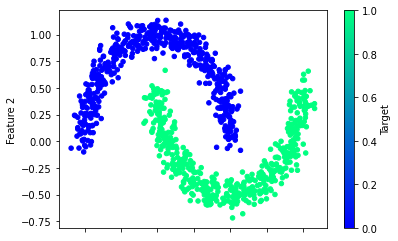

In [17]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [18]:
# We are using the same structure and function of the previous nn
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [19]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5307
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5307
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5307
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5600
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.6667
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6760 - accuracy: 0.7573
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6647 - accuracy: 0.8173
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6500 - accuracy: 0.8533
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6324 - accuracy: 0.8653
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6132 - accuracy: 0.8680
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.2962 - accuracy: 0.8947
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2954 - accuracy: 0.8933
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2947 - accuracy: 0.8933
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2941 - accuracy: 0.8933
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2933 - accuracy: 0.8933
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2927 - accuracy: 0.8933
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2921 - accuracy: 0.8947
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2915 - accuracy: 0.8933
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2908 - accuracy: 0.8933
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2902 - accuracy: 0.8933
Epoch 93/100


## The same model and function was unable to accurately classify all of our training data

<AxesSubplot:>

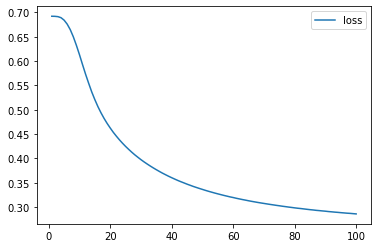

In [20]:
# Plot the loss and accuracy curves
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

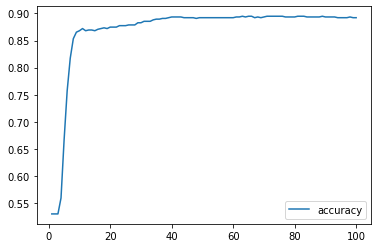

In [21]:
# Plot the loss
history_df.plot(y="accuracy")

# Start of Multiple Layer Example

In [22]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [23]:
# Create hiddenlayer with 6 neurons with units parameter
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [24]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5559 - accuracy: 0.7413
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5208 - accuracy: 0.7680
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4898 - accuracy: 0.7880
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4626 - accuracy: 0.7987
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4391 - accuracy: 0.8067
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.8200
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3998 - accuracy: 0.8307
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3837 - accuracy: 0.8347
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3692 - accuracy: 0.8453
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3567 - accuracy: 0.8520
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.2011 - accuracy: 0.9160
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2002 - accuracy: 0.9173
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1996 - accuracy: 0.9173
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1988 - accuracy: 0.9173
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1981 - accuracy: 0.9173
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1974 - accuracy: 0.9173
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1968 - accuracy: 0.9200
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1960 - accuracy: 0.9213
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1955 - accuracy: 0.9213
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1948 - accuracy: 0.9213
Epoch 93/100
